In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
 # load preprocessing and model
ordinal = pickle.load(open('ordinal_CR_WP3.pkl','rb'))
std = pickle.load(open('standard_CR_WP3.pkl','rb'))
svm = pickle.load(open('model_svm_CR_WP3.pkl','rb'))

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def counter_plot_H20(x_axis = 'PET',c_type_v = 'P1E',shap_v = 'P1El',pa_r = [0],pet_r= [0,0.044185],Reac_v = 25,rpm_r = [20,100],Re_v = 'Cust1',h2o_v = 0):
    us = np .array([350, 370, 380])  # Temp 
    vs = np.array([ 0,1,1.5,2])    #Chem    

    x_len, y_len = 100, 100        
    c_type = [c_type_v]*100
    
    shap =[shap_v]*100 
    if x_axis == 'PET':
        pa = [pa_r]*100#Pa
        pet = np.linspace(pet_r[0], pet_r[1], y_len)#PET
    elif x_axis =='PA':
        pet = [pet_r]*100#Pa
        pa = np.linspace(pa_r[0], pa_r[1], y_len)#PET
    # Reac = [25,14]
    # Reac = random.choice(Reac,size=(100))#Reac
    Reac = [Reac_v]*100#+[14]*20
    # Reac = np.zeros(100)
    rpm = np.linspace(rpm_r[0], rpm_r[1], y_len)#RPM
    Re_tyP1E = [Re_v]*100# + [1]*15
    # Re_tyP1E = random.choice(Re_tyP1E,size=(100))#Re_tyP1E
    # Re_tyP1E = np.zeros(100)
    h2o = [h2o_v]*100
    df_cat = pd.DataFrame({'type':c_type,'shap':shap,'Re_tyP1E':Re_tyP1E})
    df_cat = ordinal.transform(df_cat)
    fig, axs = plt.subplots(nrows=4, ncols=3,      
                            sharex=True, sharey=True,   
                            clear=True,        
                            figsize=(15, 10))  

    for ax, v in zip(axs, vs): #vs chem,axs : biểu đồ 
        count=0
        ax[0].set_ylabel('Chem = '+str(v)+'\nRPM', size='large', ha='right', labelpad = 5)
        
        for u in us:# us: Temp
            if v == 0:
                ax[count].set_title("Temperature = " + str(u) + "°C")
            ax[count].set_xlabel('PET, mol', size='large', ha='right', labelpad = 5)
            # ax[count].set_ylabel('RPM', size='large', ha='right', labelpad = 5)
            
            PET_m,RPM_m = np.meshgrid(pet,rpm)#pet create 100 line (and 10000 points) for pet and rpm
            PA_m = pa*np.ones_like(PET_m)# create the same size of pet from pa
            c_type_m = df_cat[:,0]*np.ones_like(PET_m)#
            Reac_m = Reac*np.ones_like(PET_m)
            shap_m = df_cat[:,1]*np.ones_like(PET_m) 
            Re_tyP1E_m =df_cat[:,2]*np.ones_like(PET_m)
            h2o = h2o*np.ones_like(PET_m)
        
            vm = v * np.ones_like(PET_m)
            um = u * np.ones_like(PET_m)
            r = np.c_[c_type_m.flatten(),shap_m.flatten(), PA_m.flatten(), PET_m.flatten(),h2o.flatten(),Reac_m.flatten(),um.flatten(),RPM_m.flatten(),Re_tyP1E_m.flatten(),vm.flatten()]
            
            # r become database with 10000 line and with the columns name above (all features)
            c = std.transform(r)
            
            c = svm.predict(c).reshape(x_len, y_len)
    
            if x_axis =='PET':
                cmap = ax[count].contour(PET_m, RPM_m, c, vmin=0, vmax = 100, cmap='gray_r')# for loop chem and for loop temp
                # finish chem and temp loop we get 12 sub charts
                plt.clabel(cmap, inline=1, fontsize=13)
                pmap = ax[count].pcolormesh(PET_m, RPM_m, c, 
                            shading='gouraud',
                            vmin=0, vmax=np.max(c), 
                            cmap='viridis')
            elif x_axis =='PA':
                cmap = ax[count].contour(PA_m, RPM_m, c, vmin=0, vmax = 100, cmap='gray_r')# for loop chem and for loop temp
                # finish chem and temp loop we get 12 sub charts
                plt.clabel(cmap, inline=1, fontsize=13)
                pmap = ax[count].pcolormesh(PA_m, RPM_m, c, 
                            shading='gouraud',
                            vmin=0, vmax=np.max(c), 
                            cmap='viridis')
                
            count += 1

    plt.tight_layout()
    plt.colorbar(pmap, ax=axs, fraction=0.05)
    plt.savefig('D:\\CR_WP3\\images\\'+f'{x_axis}_'+c_type_v+'_'+str(h2o_v)+'.png')
    plt.show()

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- shap
Feature names seen at fit time, yet now missing:
- Shap

  warnings.warn(message, FutureWarning)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

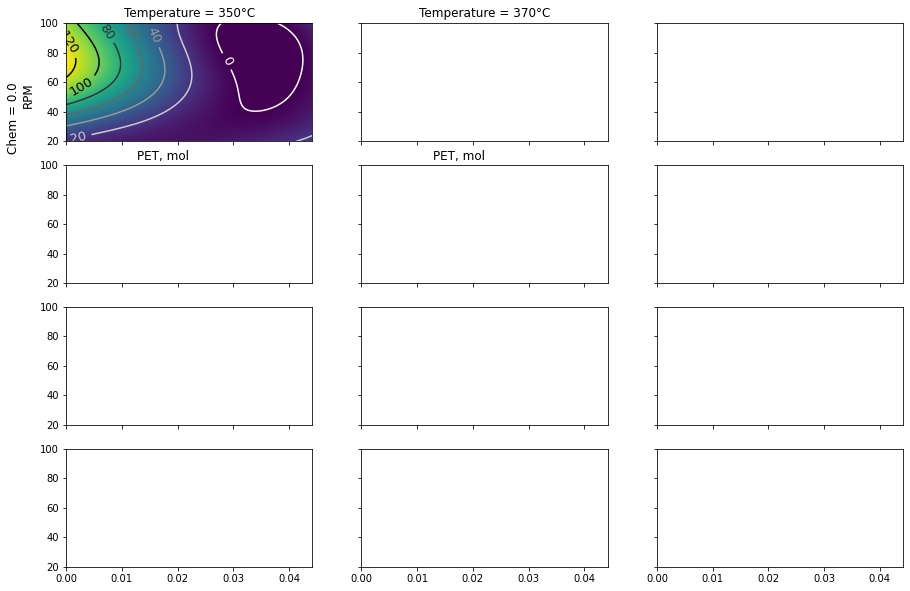

In [21]:
for i in [0,5,8,12]:
    for j in ['LLD','P1E','P1P','LDP1E']:
        counter_plot_H20(pa_r = 0,h2o_v=i,c_type_v=j)

In [ ]:
for i in [0,5,8,12]:
    for j in ['LLD','P1E','P1P','LDP1E']:
        counter_plot_H20(x_axis='PA',pet_r = 0,pa_r=[0,0.044185],h2o_v=i,c_type_v=j)
        